# THE BATTLE OF NEIGHBORHOODS

## Introduction:
Topography: The city of Los Angeles covers a total area of 502.7 square miles (1,302 km2), comprising 468.7 square miles (1,214 km2) of land and 34.0 square miles (88 km2) of water. The city extends for 44 miles (71 km) north-south and for 29 miles (47 km) east-west. The perimeter of the city is 342 miles (550 km).

Demographics: Los Angeles had a population of 3,792,621. The population density was
8,092.3 people per square mile (2,913.0/km2). The age distribution was 874,525 people (23.1%) under 18, 434,478 people (11.5%) from 18 to 24, 1,209,367 people (31.9%) from 25 to 44, 877,555 people (23.1%) from 45 to 64, and 396,696 people (10.5%) who were 65 or older. The median age was 34.1 years.

Los Angeles is a huge city and is densely populated with mostly younger groups of people.  With  its  large  area  and  demographics,  ever growing economy with varied industries and flourishing international trade, and creative culture with varied creative industries and museums, makes it a preferred place for any new business to start.

## Bussines Problem:
This project aims at recommending stakeholders an optimum location to set up their new restaurant business. We would consider several factors like location which has younger population groups, more number of venues, distance from the city center before deciding on a location for this new restaurant in this diverse city of Los Angeles.

## Data:

### Factors to be considered
Factors that will influence our decision of location of a restaurant would be:


●   Population : More number of people, more likely is the footfall to the restaurant.

Location  which  has  a  considerable  population  would  be  considered  .  Less populated areas would be discarded.

●	Venues: Location with more number of venues and less restaurants is assumed to have more footfall for these other venues and thus a restaurant in such an area would also likely have more people visiting it and thus would make it a preferred location for setting up a new restaurant business.

●   Distance: Locations which are closer to the city center would be one of the
factors which could be considered.

●	Age  based  analysis  of  the  population  around the other venues. Youth and younger  groups  of  people  are  the  ones  who  are  more  likely  to  visit  the restaurants. Thus location with younger population to be considered.


### Data Sources
Following will be the dataset and data sources used for our analysis and to extract the required information:


●	Data of Los Angeles - 2010_Census_Populations_by_Zip_Code.csv. Population and age based analysis could be done using this data set which has the data relating to these fields for the year 2010.

●   Number of restaurants, other venues in the neighborhood, vicinity of the venue,
footfall to these venues to decide the popularity of the location will be obtained using the Foursquare API. 


### Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import json
import os
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes
#pip3 install folium
!pip install folium
import folium # map rendering library
import requests
from pandas.io.json import json_normalize 
# import k-means from clustering stage
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

### Load Data

In [53]:
print(os.getcwd())
'''
# Load the data 
df = pd.read_csv('Downloads\\uscities.csv')
#print(df.head())
df = df[['city', 'state_name', 'county_fips', 'county_name', 'lat', 'lng', 'population', 'density']] # Selected columns filtered
cal_df = df.loc[df.state_name == 'California'].reset_index() # Select only cities in California
#print(cal_df)
cal_df.sort_values(by='population', ascending=False, inplace=True)
cal_df'''


'''df_sf = pd.read_html('http://www.healthysf.org/bdi/outcomes/zipmap.htm')[3]
df_sf.columns = df_sf.iloc[0]
df_sf.drop(df_sf.index[0]).reset_index(drop=True)'''

#------------------------------
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b03ca8f1966141d7b311d322dc998b83 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Tk_MdIijOp4FPW1rTtyPIRb6ndo7NE_9TbzEYtn3vTtk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b03ca8f1966141d7b311d322dc998b83.get_object(Bucket='capstonethebattleofneighborhoods-donotdelete-pr-sp2zf43zdzdrbd',Key='2010_Census_Populations_by_Zip_Code.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_la1 = pd.read_csv(body)
df_la1.head()
#-------------------------------



#df_la1 = pd.read_csv('Downloads\\2010_Census_Populations_by_Zip_Code.csv')
'''df_la2 = pd.read_html('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?zip=902')[3]
print(df_la1.shape)
print(df_la2.shape)
lacities = [df_la1, df_la2]

df_la = pd.concat(df_la1, sort=False)
df_la.reset_index(drop=True)'''
#print(df_la1.dtypes)
print(df_la1)


/home/wsuser/work
     Zip Code  Total Population  Median Age  Total Males  Total Females  \
0       91371                 1        73.5            0              1   
1       90001             57110        26.6        28468          28642   
2       90002             51223        25.5        24876          26347   
3       90003             66266        26.3        32631          33635   
4       90004             62180        34.8        31302          30878   
5       90005             37681        33.9        19299          18382   
6       90006             59185        32.4        30254          28931   
7       90007             40920        24.0        20915          20005   
8       90008             32327        39.7        14477          17850   
9       90010              3800        37.8         1874           1926   
10      90011            103892        26.2        52794          51098   
11      90012             31103        36.3        19493          11610   
12     

In [54]:
print('There are {} unique zip codes.'.format(len(df_la1['Zip Code'].unique())))

# Dropping last 2 columns as we are not using them

df_la1.drop(columns = ["Total Households", "Average Household Size"], inplace=True)
df_la1

There are 319 unique zip codes.


,Zip Code,Total Population,Median Age,Total Males,Total Females
0,91371,1,73.5,0,1
1,90001,57110,26.6,28468,28642
2,90002,51223,25.5,24876,26347
3,90003,66266,26.3,32631,33635
4,90004,62180,34.8,31302,30878
5,90005,37681,33.9,19299,18382
6,90006,59185,32.4,30254,28931
7,90007,40920,24.0,20915,20005
8,90008,32327,39.7,14477,17850
9,90010,3800,37.8,1874,1926


In [55]:
address = 'Los Angeles'

geolocator = Nominatim(user_agent="LA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.242766.


In [56]:

map_la = folium.Map(location=[latitude, longitude], zoom_start = 11)
# add markers to map
'''for zzip, label in zip(df_la1['Zip Code'], df_la1['Total Population']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [zzip],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  '''
    
map_la

### Define foursquare credentials and version

In [57]:
CLIENT_ID = 'RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD' # your Foursquare ID
CLIENT_SECRET = 'HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD
CLIENT_SECRET:HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ


In [58]:
limit = 1000
radius = 20000


url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format('RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD', 'HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ', latitude, longitude, 'IFKS1EKMPXQKZSHR0UP2QFIABBPP1GDJRMU3VM20WJFIM13E', 20201212, radius, limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=RW12TBEPLUWAY2AAMQI31OD1LUMGBRKSIOKSBRV3NTXUQAXD&client_secret=HDX4UJNS3M12EGPAK3ERUYHDFRD34EYNPAYZZBKLPHFUDKWQ&ll=34.0536909,-118.242766&oauth_token=IFKS1EKMPXQKZSHR0UP2QFIABBPP1GDJRMU3VM20WJFIM13E&v=20201212&radius=20000&limit=1000'

In [59]:
# response for los anageles city
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60237476c90f22500f670ff0'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Los Angeles',
  'headerFullLocation': 'Los Angeles',
  'headerLocationGranularity': 'city',
  'totalResults': 196,
  'suggestedBounds': {'ne': {'lat': 34.23369108000018,
    'lng': -118.0259147785622},
   'sw': {'lat': 33.87369071999982, 'lng': -118.45961722143781}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fecf601067d351381ea64fa',
       'name': 'Grand Park',
       'location': {'address': '200 N Grand Ave',
        'crossStreet': 'btwn Temple &

In [60]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [61]:
# Clean the json and structure it into a pandas dataframe. Venues listed here are for the city of Los Angeles

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.location.postalCode', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance']
nearby_venues = nearby_venues.loc[:, filtered_columns]
#print(nearby_venues)

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
#print(nearby_venues)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.rename(columns = {'name' : 'Venue', 'postalCode' : 'Zip Code'}, inplace = True)
nearby_venues.sort_values(by = ['distance'], ascending=True)
nearby_venues.dropna(inplace=True)
nearby_venues['Zip Code'] = nearby_venues['Zip Code'].astype(str).astype(np.int64)
print(nearby_venues)
nearby_venues.shape
#print(nearby_venues['Zip Code'])

#df["a"] = df["a"].astype(str).astype(int)

                                           Venue  Zip Code  \
0                                     Grand Park     90012   
1                       Walt Disney Concert Hall     90012   
2                      Dorothy Chandler Pavilion     90012   
3                                      The Broad     90012   
4                       Los Angeles Music Center     90012   
5                           Grand Central Market     90013   
6                               Ahmanson Theatre     90012   
7                             The Last Bookstore     90013   
8                                    Tilt Coffee     90013   
9                                 Hauser & Wirth     90013   
10                                  Salt & Straw     90013   
11          KazuNori: The Original Hand Roll Bar     90013   
12            Labyrinth Above The Last Bookstore     90013   
13                                    Wurstküche     90013   
14             Mr. Speedy Plumbing & Rooter Inc.     90013   
15      

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


(99, 6)

In [62]:
merge_data = pd.merge(df_la1, nearby_venues, on = 'Zip Code')
#print(df_la['Zip Code'])
#print(nearby_venues['Zip Code'])
merge_data

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance
0,90004,62180,34.8,31302,30878,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704,7842
1,90004,62180,34.8,31302,30878,Salt & Straw,Ice Cream Shop,34.075836,-118.323535,7845
2,90004,62180,34.8,31302,30878,Lemonade,Restaurant,34.082516,-118.323384,8097
3,90007,40920,24.0,20915,20005,USC Village,College Residence Hall,34.025655,-118.284652,4966
4,90007,40920,24.0,20915,20005,Natural History Museum of Los Angeles County,Museum,34.016829,-118.288829,5907
5,90010,3800,37.8,1874,1926,Document Coffee Bar,Coffee Shop,34.061254,-118.311050,6353
6,90012,31103,36.3,19493,11610,Grand Park,Park,34.055034,-118.245179,268
7,90012,31103,36.3,19493,11610,Walt Disney Concert Hall,Concert Hall,34.055511,-118.249284,634
8,90012,31103,36.3,19493,11610,Dorothy Chandler Pavilion,Performing Arts Venue,34.056625,-118.248886,652
9,90012,31103,36.3,19493,11610,The Broad,Art Museum,34.054474,-118.250051,677


In [63]:
#Lets group by the population and sort by population

#nearby_venues.groupby(by= ["Venue"]).count().sort_values(by = 'categories', ascending=False)

#merge_data.groupby(by = ["Neighborhood"]).count()
grouped_by_population = merge_data.groupby(by = ["Total Population", "Zip Code"]).count()
grouped_by_population = grouped_by_population.sort_values(by = ["Total Population", "Zip Code"], ascending=False)
print(grouped_by_population.shape)
grouped_by_population

(30, 8)


,,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance
Total Population,Zip Code,,,,,,,,
67869,90026,5,5,5,5,5,5,5,5
64458,90019,2,2,2,2,2,2,2,2
62430,90042,1,1,1,1,1,1,1,1
62276,90037,1,1,1,1,1,1,1,1
62180,90004,3,3,3,3,3,3,3,3
52735,91801,1,1,1,1,1,1,1,1
48581,90046,4,4,4,4,4,4,4,4
45903,90023,1,1,1,1,1,1,1,1
45151,90027,10,10,10,10,10,10,10,10


In [64]:

array = ['90026', '90019', '90042', '90037', '90004', '91801', '90046', '90016', '90023', '90027', '90007', '90031', '90020', '90029', '90036', 
         '90012', '90038', '90028', '90039', '90041', '91030', '90017', '90068', '90048', '90015', '90232', '91203', '90013']
print(len(array))
df = merge_data.loc[merge_data['Zip Code'].isin(array)]
df

28


,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance
0,90004,62180,34.8,31302,30878,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704,7842
1,90004,62180,34.8,31302,30878,Salt & Straw,Ice Cream Shop,34.075836,-118.323535,7845
2,90004,62180,34.8,31302,30878,Lemonade,Restaurant,34.082516,-118.323384,8097
3,90007,40920,24.0,20915,20005,USC Village,College Residence Hall,34.025655,-118.284652,4966
4,90007,40920,24.0,20915,20005,Natural History Museum of Los Angeles County,Museum,34.016829,-118.288829,5907
6,90012,31103,36.3,19493,11610,Grand Park,Park,34.055034,-118.245179,268
7,90012,31103,36.3,19493,11610,Walt Disney Concert Hall,Concert Hall,34.055511,-118.249284,634
8,90012,31103,36.3,19493,11610,Dorothy Chandler Pavilion,Performing Arts Venue,34.056625,-118.248886,652
9,90012,31103,36.3,19493,11610,The Broad,Art Museum,34.054474,-118.250051,677
10,90012,31103,36.3,19493,11610,Los Angeles Music Center,Music Venue,34.057133,-118.248354,642


### Lets group by category to get an idea of the count of different venues in every zip code.

In [65]:
group_by_cat = df.groupby(by = ['Zip Code', 'categories']).count()
group_by_cat

Total Population  Median Age  Total Males  \
Zip Code categories                                                            
90004    Ice Cream Shop                           1           1            1   
         Restaurant                               1           1            1   
         Sandwich Place                           1           1            1   
90007    College Residence Hall                   1           1            1   
         Museum                                   1           1            1   
90012    Art Museum                               1           1            1   
         Baseball Stadium                         1           1            1   
         Concert Hall                             1           1            1   
         Music Venue                              1           1            1   
         Park                                     1           1            1   
         Performing Arts Venue                    1           1            1   
         Theater                                  1           1            1   
90013    Art Gallery                              2           2            2   
         Bookstore                                2           2            2   
         Coffee Shop                              1           1            1   
         German Restaurant                        1           1            1   
         Home Service                             1           1            1   
         Ice Cream Shop                           1           1            1   
         Market                                   1           1            1   
         Mediterranean Restaurant                 1           1            1   
         Sushi Restaurant                         1           1            1   
90015    Basketball Stadium                       1           1            1   
         Theater                                  1           1            1   
90017    Grocery Store                            1           1            1   
         Rock Club                                1           1            1   
90019    Ethiopian Restaurant                     1           1            1   
         Nightclub                                1           1            1   
90020    Korean Restaurant                        1           1            1   
90023    Liquor Store                             1           1            1   
90026    Park                                     1           1            1   
         Restaurant                               1           1            1   
         Taco Place                               2           2            2   
         Taiwanese Restaurant                     1           1            1   
90027    Amphitheater                             1           1            1   
         Breakfast Spot                           1           1            1   
         Coffee Shop                              1           1            1   
         Food Truck                               1           1            1   
         Movie Theater                            1           1            1   
         Observatory                              1           1            1   
         Park                                     2           2            2   
         Planetarium                              1           1            1   
         Scenic Lookout                           1           1            1   
90028    Farmers Market                           1           1            1   
         Gym                                      1           1            1   
         Italian Restaurant                       1           1            1   
         Movie Theater                            1           1            1   
         Salon / Barbershop                       1           1            1   
         Theater                                  1           1            1   
         Wine Shop                 

In [66]:
print('There are {} uniques categories.'.format(len(df['categories'].unique())))
print('There are {} uniques zip code.'.format(len(df['Zip Code'].unique())))

There are 56 uniques categories.
There are 26 uniques zip code.


In [67]:
# one hot encoding
la_onehot = pd.get_dummies(df[['categories']], prefix="", prefix_sep="")
#print(manhattan_onehot)
# add Zip Code column back to dataframe
la_onehot['Zip Code'] = df['Zip Code'] 


# move Zip Code column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

#la_onehot.groupby(by=['Zip Code']).count()
la_onehot = la_onehot.reset_index(drop=True)
la_onehot.head()

,Zip Code,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Baseball Stadium,Basketball Stadium,Bookstore,Breakfast Spot,Café,Coffee Shop,College Residence Hall,Concert Hall,Deli / Bodega,Ethiopian Restaurant,Farmers Market,Food Truck,French Restaurant,German Restaurant,Grocery Store,Gym,Home Service,Ice Cream Shop,Italian Restaurant,Jazz Club,Korean Restaurant,Liquor Store,Market,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,Nightclub,Observatory,Park,Performing Arts Venue,Pizza Place,Planetarium,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tattoo Parlor,Theater,Trail,Wine Shop,Yoga Studio
0,90004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,90004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,90004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,90007,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,90007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Let's group rows by zip code and by taking the mean of the frequency of occurrence of each category

In [68]:
la_group_zip = la_onehot.groupby('Zip Code').mean().reset_index()
la_group_zip.head()

,Zip Code,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Baseball Stadium,Basketball Stadium,Bookstore,Breakfast Spot,Café,Coffee Shop,College Residence Hall,Concert Hall,Deli / Bodega,Ethiopian Restaurant,Farmers Market,Food Truck,French Restaurant,German Restaurant,Grocery Store,Gym,Home Service,Ice Cream Shop,Italian Restaurant,Jazz Club,Korean Restaurant,Liquor Store,Market,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,Nightclub,Observatory,Park,Performing Arts Venue,Pizza Place,Planetarium,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tattoo Parlor,Theater,Trail,Wine Shop,Yoga Studio
0,90004,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,90007,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,90012,0.0,0.000000,0.142857,0.0,0.0,0.0,0.142857,0.0,0.000000,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.142857,0.142857,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0
3,90013,0.0,0.181818,0.000000,0.0,0.0,0.0,0.000000,0.0,0.181818,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.090909,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,90015,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0


In [69]:
la_group_zip['Zip Code'].describe()
#df.astype({'col1': 'int32'}).dtypes
la_group_zip = la_group_zip.astype({'Zip Code': 'str'})
la_group_zip.head()

,Zip Code,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Baseball Stadium,Basketball Stadium,Bookstore,Breakfast Spot,Café,Coffee Shop,College Residence Hall,Concert Hall,Deli / Bodega,Ethiopian Restaurant,Farmers Market,Food Truck,French Restaurant,German Restaurant,Grocery Store,Gym,Home Service,Ice Cream Shop,Italian Restaurant,Jazz Club,Korean Restaurant,Liquor Store,Market,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,Nightclub,Observatory,Park,Performing Arts Venue,Pizza Place,Planetarium,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Shopping Mall,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tattoo Parlor,Theater,Trail,Wine Shop,Yoga Studio
0,90004,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,90007,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,90012,0.0,0.000000,0.142857,0.0,0.0,0.0,0.142857,0.0,0.000000,0.0,0.0,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.142857,0.142857,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0
3,90013,0.0,0.181818,0.000000,0.0,0.0,0.0,0.000000,0.0,0.181818,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.090909,0.090909,0.0,0.0,0.0,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,90015,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0


In [70]:
num_top_venues = 5

for pcode in la_group_zip['Zip Code']:
    print("----"+pcode+"----")
    temp = la_group_zip[la_group_zip['Zip Code'] == pcode].T.reset_index()
   # print(temp.head(), '\n')
    temp.columns = ['venue','freq']
   # print(temp.head(), '\n')
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----90004----
            venue  freq
0  Ice Cream Shop  0.33
1      Restaurant  0.33
2  Sandwich Place  0.33
3    Amphitheater  0.00
4       Rock Club  0.00


----90007----
                    venue  freq
0                  Museum   0.5
1  College Residence Hall   0.5
2            Amphitheater   0.0
3      Salon / Barbershop   0.0
4           Movie Theater   0.0


----90012----
              venue  freq
0        Art Museum  0.14
1       Music Venue  0.14
2           Theater  0.14
3  Baseball Stadium  0.14
4              Park  0.14


----90013----
               venue  freq
0          Bookstore  0.18
1        Art Gallery  0.18
2   Sushi Restaurant  0.09
3  German Restaurant  0.09
4       Home Service  0.09


----90015----
                venue  freq
0             Theater   0.5
1  Basketball Stadium   0.5
2        Amphitheater   0.0
3  Salon / Barbershop   0.0
4       Movie Theater   0.0


----90017----
                      venue  freq
0             Grocery Store   0.5
1               

### Let's put that into a pandas dataframe

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    #print(row_categories)
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zip_venues_sorted = pd.DataFrame(columns=columns)
zip_venues_sorted['Zip Code'] = la_group_zip[str('Zip Code')]

for ind in np.arange(la_group_zip.shape[0]):
    zip_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_group_zip.iloc[ind, :], num_top_venues)

zip_venues_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,90004,Restaurant,Ice Cream Shop,Sandwich Place,Yoga Studio,Italian Restaurant,Home Service,Gym,Grocery Store,German Restaurant,French Restaurant
1,90007,Museum,College Residence Hall,Yoga Studio,Ethiopian Restaurant,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store
2,90012,Concert Hall,Art Museum,Theater,Baseball Stadium,Music Venue,Park,Performing Arts Venue,Ethiopian Restaurant,Ice Cream Shop,Home Service
3,90013,Art Gallery,Bookstore,Mediterranean Restaurant,Coffee Shop,German Restaurant,Home Service,Ice Cream Shop,Market,Sushi Restaurant,Shopping Mall
4,90015,Theater,Basketball Stadium,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store


### Cluster Zip codes into 6 clusters

In [73]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_group_zip)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 3, 1, 2], dtype=int32)

In [74]:
if 'Cluster Labels' in zip_venues_sorted.columns:
    del zip_venues_sorted['Cluster Labels']
    del zip_venues_sorted['Latitude']
    del zip_venues_sorted['Longitude']

zip_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
zip_venues_sorted.insert(1, 'Latitude', df['lat'])
zip_venues_sorted.insert(1, 'Longitude', df['lng'])
zip_venues_sorted.head()

,Cluster Labels,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,-118.323704,34.075327,90004,Restaurant,Ice Cream Shop,Sandwich Place,Yoga Studio,Italian Restaurant,Home Service,Gym,Grocery Store,German Restaurant,French Restaurant
1,5,-118.323535,34.075836,90007,Museum,College Residence Hall,Yoga Studio,Ethiopian Restaurant,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store
2,5,-118.323384,34.082516,90012,Concert Hall,Art Museum,Theater,Baseball Stadium,Music Venue,Park,Performing Arts Venue,Ethiopian Restaurant,Ice Cream Shop,Home Service
3,5,-118.284652,34.025655,90013,Art Gallery,Bookstore,Mediterranean Restaurant,Coffee Shop,German Restaurant,Home Service,Ice Cream Shop,Market,Sushi Restaurant,Shopping Mall
4,5,-118.288829,34.016829,90015,Theater,Basketball Stadium,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store


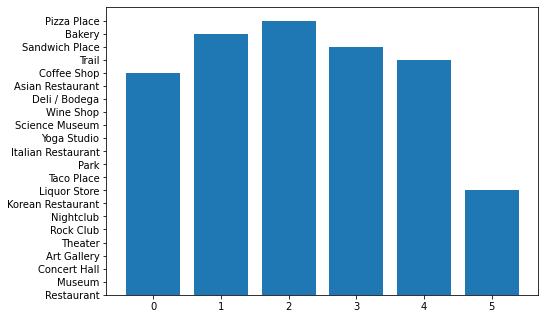

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(zip_venues_sorted['Cluster Labels'], zip_venues_sorted['1st Most Common Venue'])
plt.show()

In [93]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

zip_venues_sorted = zip_venues_sorted.astype({'Zip Code': 'int32'})
zip_venues_sorted = zip_venues_sorted.fillna(0)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zip_venues_sorted['Latitude'], zip_venues_sorted['Longitude'], 
                                  zip_venues_sorted['Zip Code'], zip_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine all the clusters
### Cluster 1

In [77]:
c1 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 0, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c1

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,-118.250051,34.054474,90026,Taco Place,Taiwanese Restaurant,Park,Restaurant,Yoga Studio,Concert Hall,Ice Cream Shop,Home Service,Gym,Grocery Store
10,-118.248354,34.057133,90027,Park,Planetarium,Breakfast Spot,Observatory,Coffee Shop,Movie Theater,Scenic Lookout,Food Truck,Farmers Market,Yoga Studio
11,-118.247434,34.058145,90028,Italian Restaurant,Wine Shop,Theater,Movie Theater,Gym,Farmers Market,Salon / Barbershop,Deli / Bodega,Ice Cream Shop,Home Service
12,-118.241164,34.074188,90029,Yoga Studio,Mexican Restaurant,Liquor Store,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
13,-118.248741,34.050675,90031,Taco Place,Pizza Place,Yoga Studio,Deli / Bodega,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
14,-118.249852,34.047620,90036,Italian Restaurant,Yoga Studio,Shopping Mall,French Restaurant,Farmers Market,Breakfast Spot,Sculpture Garden,Jazz Club,Art Museum,Arts & Crafts Store
15,-118.246359,34.048258,90037,Science Museum,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
16,-118.234801,34.046095,90038,Italian Restaurant,Yoga Studio,Deli / Bodega,Jazz Club,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,French Restaurant
17,-118.235473,34.046065,90039,Wine Shop,Mediterranean Restaurant,Bakery,Café,Sandwich Place,Yoga Studio,Ethiopian Restaurant,Italian Restaurant,Ice Cream Shop,Home Service
18,-118.247452,34.047716,90041,Deli / Bodega,Bakery,Yoga Studio,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


### Cluster 2

In [78]:
c2 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 1, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c2

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,0.0,0.0,91203,Bakery,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


### Cluster 3

In [79]:
c3 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 2, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c3

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,0.0,0.0,91801,Pizza Place,Yoga Studio,Liquor Store,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


### Cluster 4

In [80]:
c4 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 3, zip_venues_sorted.columns[[1]+ list(range(2, zip_venues_sorted.shape[1]))]]
c4

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,-118.232955,34.041506,91030,Sandwich Place,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


### Cluster 5

In [81]:
c5 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 4, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c5

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,-118.236745,34.043176,90068,Trail,Music Venue,Scenic Lookout,Yoga Studio,Deli / Bodega,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store


### Cluster 6

In [82]:
c6 = zip_venues_sorted.loc[zip_venues_sorted['Cluster Labels'] == 5, zip_venues_sorted.columns[[1] + list(range(2, zip_venues_sorted.shape[1]))]]
c6

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-118.323704,34.075327,90004,Restaurant,Ice Cream Shop,Sandwich Place,Yoga Studio,Italian Restaurant,Home Service,Gym,Grocery Store,German Restaurant,French Restaurant
1,-118.323535,34.075836,90007,Museum,College Residence Hall,Yoga Studio,Ethiopian Restaurant,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store
2,-118.323384,34.082516,90012,Concert Hall,Art Museum,Theater,Baseball Stadium,Music Venue,Park,Performing Arts Venue,Ethiopian Restaurant,Ice Cream Shop,Home Service
3,-118.284652,34.025655,90013,Art Gallery,Bookstore,Mediterranean Restaurant,Coffee Shop,German Restaurant,Home Service,Ice Cream Shop,Market,Sushi Restaurant,Shopping Mall
4,-118.288829,34.016829,90015,Theater,Basketball Stadium,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store
5,0.000000,0.000000,90017,Rock Club,Grocery Store,Liquor Store,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,German Restaurant,French Restaurant
6,-118.245179,34.055034,90019,Nightclub,Ethiopian Restaurant,Yoga Studio,Liquor Store,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store
7,-118.249284,34.055511,90020,Korean Restaurant,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,French Restaurant
8,-118.248886,34.056625,90023,Liquor Store,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


In [83]:
# Combine cluster 1 and cluster 6 and discard other clusters as per the analysis above

cluster_to_consider = c1.append(c6)
cluster_to_consider.dtypes
cluster_to_consider = cluster_to_consider.astype({'Zip Code': 'int64'})
cluster_to_consider

,Longitude,Latitude,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,-118.250051,34.054474,90026,Taco Place,Taiwanese Restaurant,Park,Restaurant,Yoga Studio,Concert Hall,Ice Cream Shop,Home Service,Gym,Grocery Store
10,-118.248354,34.057133,90027,Park,Planetarium,Breakfast Spot,Observatory,Coffee Shop,Movie Theater,Scenic Lookout,Food Truck,Farmers Market,Yoga Studio
11,-118.247434,34.058145,90028,Italian Restaurant,Wine Shop,Theater,Movie Theater,Gym,Farmers Market,Salon / Barbershop,Deli / Bodega,Ice Cream Shop,Home Service
12,-118.241164,34.074188,90029,Yoga Studio,Mexican Restaurant,Liquor Store,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
13,-118.248741,34.050675,90031,Taco Place,Pizza Place,Yoga Studio,Deli / Bodega,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
14,-118.249852,34.047620,90036,Italian Restaurant,Yoga Studio,Shopping Mall,French Restaurant,Farmers Market,Breakfast Spot,Sculpture Garden,Jazz Club,Art Museum,Arts & Crafts Store
15,-118.246359,34.048258,90037,Science Museum,Yoga Studio,Deli / Bodega,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant
16,-118.234801,34.046095,90038,Italian Restaurant,Yoga Studio,Deli / Bodega,Jazz Club,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant,French Restaurant
17,-118.235473,34.046065,90039,Wine Shop,Mediterranean Restaurant,Bakery,Café,Sandwich Place,Yoga Studio,Ethiopian Restaurant,Italian Restaurant,Ice Cream Shop,Home Service
18,-118.247452,34.047716,90041,Deli / Bodega,Bakery,Yoga Studio,Jazz Club,Italian Restaurant,Ice Cream Shop,Home Service,Gym,Grocery Store,German Restaurant


In [84]:
# Lets merge the clusters chosen and the dataframe 'df' to get population, age and distance columns for further analysis

merge_df = pd.merge(df, cluster_to_consider, on='Zip Code')
merge_df = merge_df.drop(merge_df.iloc[ : , 15:], axis = 1)
merge_df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90004,62180,34.8,31302,30878,Larchmont Village Wine & Cheese,Sandwich Place,34.075327,-118.323704,7842,-118.323704,34.075327,Restaurant,Ice Cream Shop,Sandwich Place
1,90004,62180,34.8,31302,30878,Salt & Straw,Ice Cream Shop,34.075836,-118.323535,7845,-118.323704,34.075327,Restaurant,Ice Cream Shop,Sandwich Place
2,90004,62180,34.8,31302,30878,Lemonade,Restaurant,34.082516,-118.323384,8097,-118.323704,34.075327,Restaurant,Ice Cream Shop,Sandwich Place
3,90007,40920,24.0,20915,20005,USC Village,College Residence Hall,34.025655,-118.284652,4966,-118.323535,34.075836,Museum,College Residence Hall,Yoga Studio
4,90007,40920,24.0,20915,20005,Natural History Museum of Los Angeles County,Museum,34.016829,-118.288829,5907,-118.323535,34.075836,Museum,College Residence Hall,Yoga Studio
5,90012,31103,36.3,19493,11610,Grand Park,Park,34.055034,-118.245179,268,-118.323384,34.082516,Concert Hall,Art Museum,Theater
6,90012,31103,36.3,19493,11610,Walt Disney Concert Hall,Concert Hall,34.055511,-118.249284,634,-118.323384,34.082516,Concert Hall,Art Museum,Theater
7,90012,31103,36.3,19493,11610,Dorothy Chandler Pavilion,Performing Arts Venue,34.056625,-118.248886,652,-118.323384,34.082516,Concert Hall,Art Museum,Theater
8,90012,31103,36.3,19493,11610,The Broad,Art Museum,34.054474,-118.250051,677,-118.323384,34.082516,Concert Hall,Art Museum,Theater
9,90012,31103,36.3,19493,11610,Los Angeles Music Center,Music Venue,34.057133,-118.248354,642,-118.323384,34.082516,Concert Hall,Art Museum,Theater


In [85]:
# Sort the dataframe by the total population to see which zip code has higher population, which could be a factor to decide the location of restaurant

sort_by_pop = merge_df.groupby(['Zip Code', 'Total Population']).count().sort_values(by = 'Total Population', ascending = False) # grouping it so that we could plot a bar graph
sort_by_pop.reset_index(inplace=True)
sort_by_pop

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90026,67869,5,5,5,5,5,5,5,5,5,5,5,5,5
1,90019,64458,2,2,2,2,2,2,2,2,2,2,2,2,2
2,90042,62430,1,1,1,1,1,1,1,1,1,1,1,1,1
3,90037,62276,1,1,1,1,1,1,1,1,1,1,1,1,1
4,90004,62180,3,3,3,3,3,3,3,3,3,3,3,3,3
5,90046,48581,4,4,4,4,4,4,4,4,4,4,4,4,4
6,90023,45903,1,1,1,1,1,1,1,1,1,1,1,1,1
7,90027,45151,10,10,10,10,10,10,10,10,10,10,10,10,10
8,90007,40920,2,2,2,2,2,2,2,2,2,2,2,2,2
9,90031,39316,2,2,2,2,2,2,2,2,2,2,2,2,2


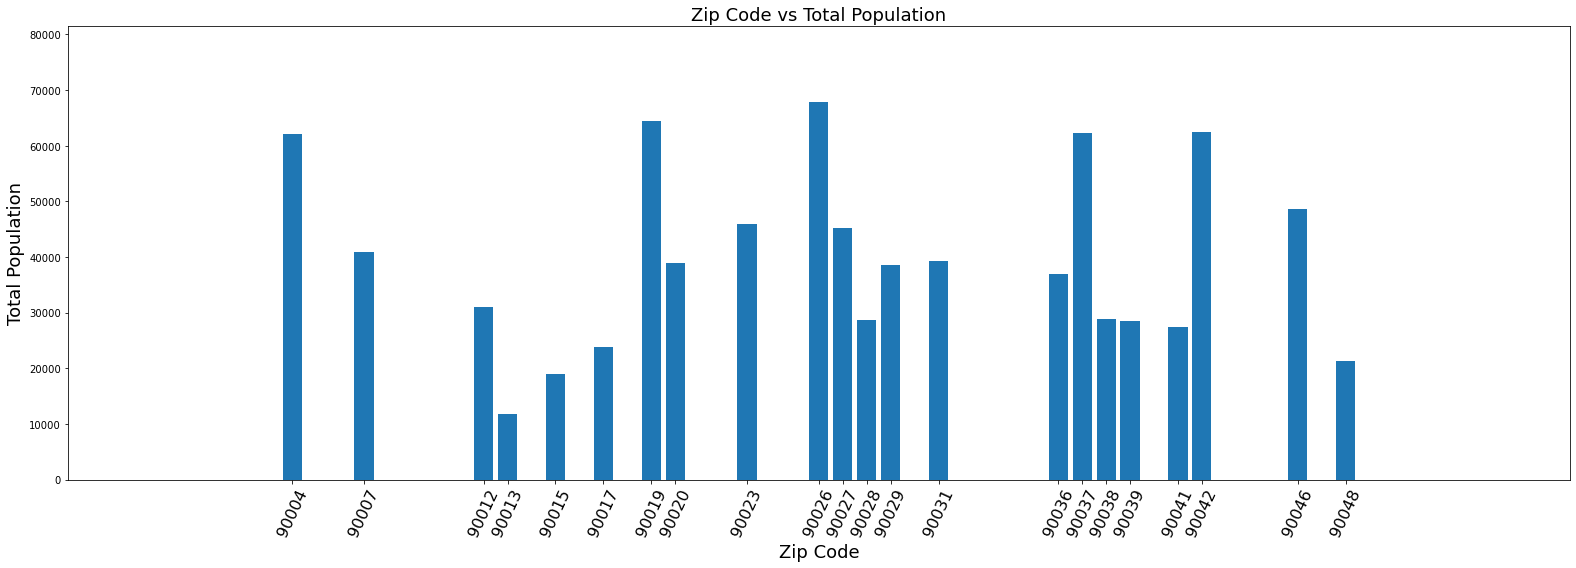

In [86]:
# Bar Plot to show the max population in the clusters chosen

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = sort_by_pop['Zip Code']
#print(xAxis.tolist())
yAxis = sort_by_pop['Total Population']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = sort_by_pop['Zip Code']
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

#ax.title('Zip Code vs Total population')
ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Total Population', size = 18)
ax.set_title('Zip Code vs Total Population', size = 18)
fig.tight_layout()
plt.show()

In [87]:
# Sort the dataframe by the median age to see which zip code has younger population group, we could argue that younger population tend to visit restaurants more often than the older group.

sort_by_age = merge_df.groupby(by = ['Zip Code', 'Median Age']).count().sort_values(by = 'Median Age', ascending = True)
sort_by_age.reset_index(inplace=True)
sort_by_age

,Zip Code,Median Age,Total Population,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90007,24.0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,90023,28.4,1,1,1,1,1,1,1,1,1,1,1,1,1
2,90037,28.8,1,1,1,1,1,1,1,1,1,1,1,1,1
3,90017,29.4,2,2,2,2,2,2,2,2,2,2,2,2,2
4,90015,31.3,2,2,2,2,2,2,2,2,2,2,2,2,2
5,90038,33.1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,90031,33.5,2,2,2,2,2,2,2,2,2,2,2,2,2
7,90042,33.6,1,1,1,1,1,1,1,1,1,1,1,1,1
8,90036,33.9,11,11,11,11,11,11,11,11,11,11,11,11,11
9,90026,34.0,5,5,5,5,5,5,5,5,5,5,5,5,5


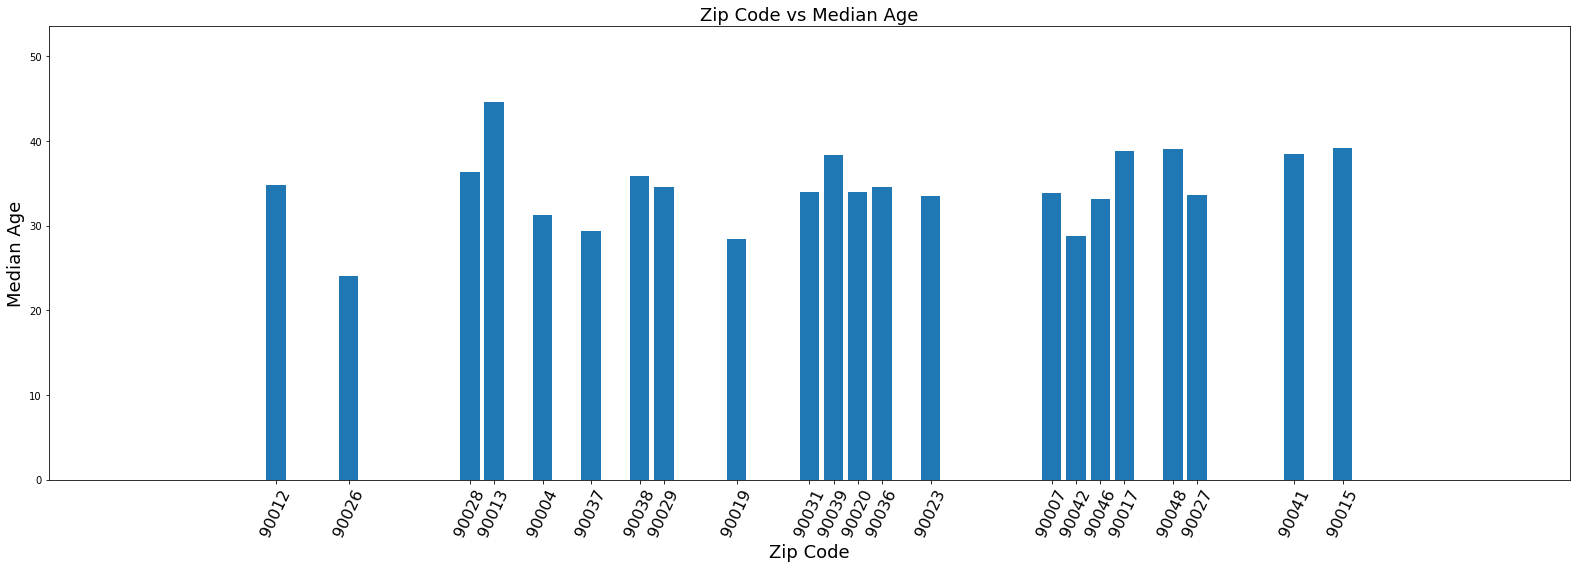

In [88]:
# Bar Plot to show the median age of the population in the clusters chosen

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = sort_by_age['Zip Code']
#print(xAxis.tolist())
yAxis = sort_by_age['Median Age']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = sort_by_pop['Zip Code']
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

#ax.title('Zip Code vs Total population')
ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Median Age', size = 18)
ax.set_title('Zip Code vs Median Age', size = 18)
fig.tight_layout()
plt.show()

In [89]:
# Sort the dataframe by distance from the city center to see which zip code is closer to the city center, which could be a factor to decide the location of restaurant. 
# Closer to city center, more footfall

sort_by_dist = merge_df.groupby(['Zip Code', 'distance']).count().sort_values(by = ['distance'], ascending = True)
sort_by_dist.reset_index(inplace=True)
sort_by_dist

,Zip Code,distance,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90012,268,1,1,1,1,1,1,1,1,1,1,1,1,1
1,90012,634,1,1,1,1,1,1,1,1,1,1,1,1,1
2,90012,642,1,1,1,1,1,1,1,1,1,1,1,1,1
3,90013,645,1,1,1,1,1,1,1,1,1,1,1,1,1
4,90012,652,1,1,1,1,1,1,1,1,1,1,1,1,1
5,90012,656,1,1,1,1,1,1,1,1,1,1,1,1,1
6,90012,677,1,1,1,1,1,1,1,1,1,1,1,1,1
7,90013,689,1,1,1,1,1,1,1,1,1,1,1,1,1
8,90013,793,1,1,1,1,1,1,1,1,1,1,1,1,1
9,90013,939,1,1,1,1,1,1,1,1,1,1,1,1,1


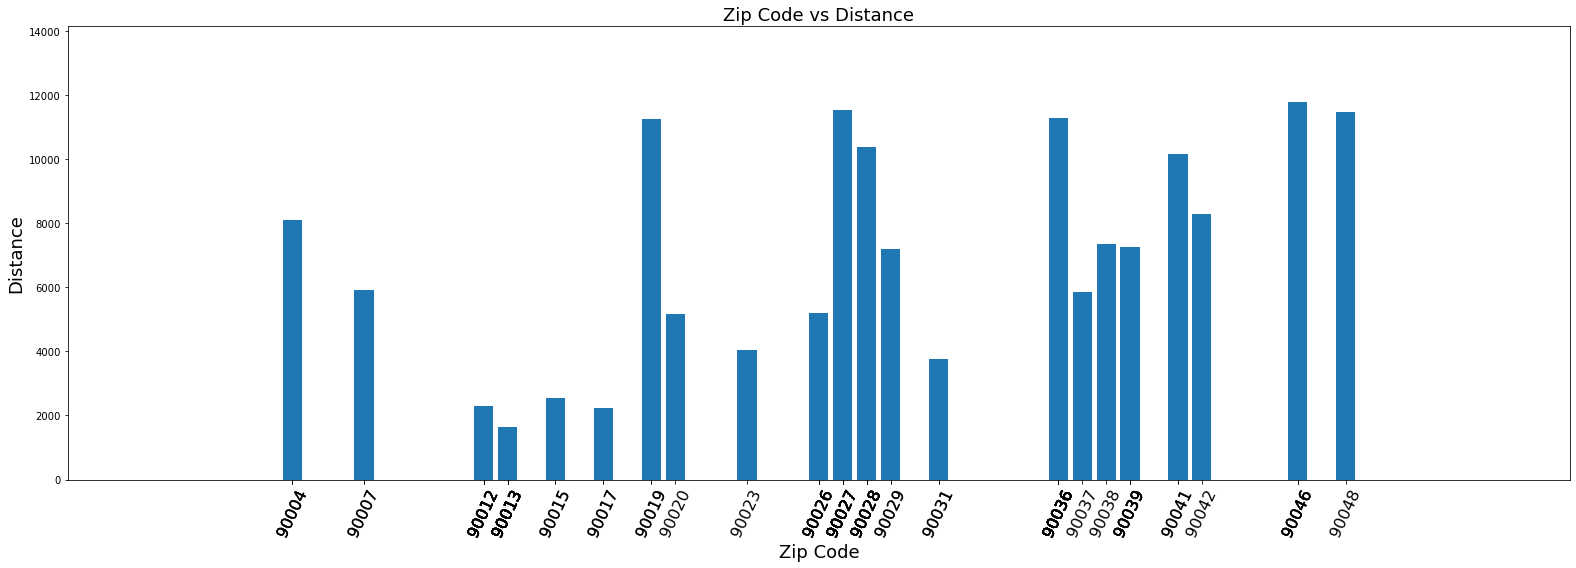

In [90]:
# Bar Plot to show the median age of the population in the clusters chosen

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = sort_by_dist['Zip Code']
#print(xAxis.tolist())
yAxis = sort_by_dist['distance']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = sort_by_dist['Zip Code']
#print(LABELS)
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Distance', size = 18)
ax.set_title('Zip Code vs Distance', size = 18)
fig.tight_layout()
plt.show()

In [91]:
# Get the number of venues in each zip code to know the popularity of the zip code and the probable footfall 

group_by_venue = merge_df.groupby(by = 'Zip Code').count().sort_values(by = 'Venue', ascending = False) 
group_by_venue.reset_index(inplace=True)
group_by_venue

,Zip Code,Total Population,Median Age,Total Males,Total Females,Venue,categories,lat,lng,distance,Longitude,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,90013,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,90036,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,90027,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,90028,7,7,7,7,7,7,7,7,7,7,7,7,7,7
4,90012,7,7,7,7,7,7,7,7,7,7,7,7,7,7
5,90026,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,90039,5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,90046,4,4,4,4,4,4,4,4,4,4,4,4,4,4
8,90004,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,90007,2,2,2,2,2,2,2,2,2,2,2,2,2,2


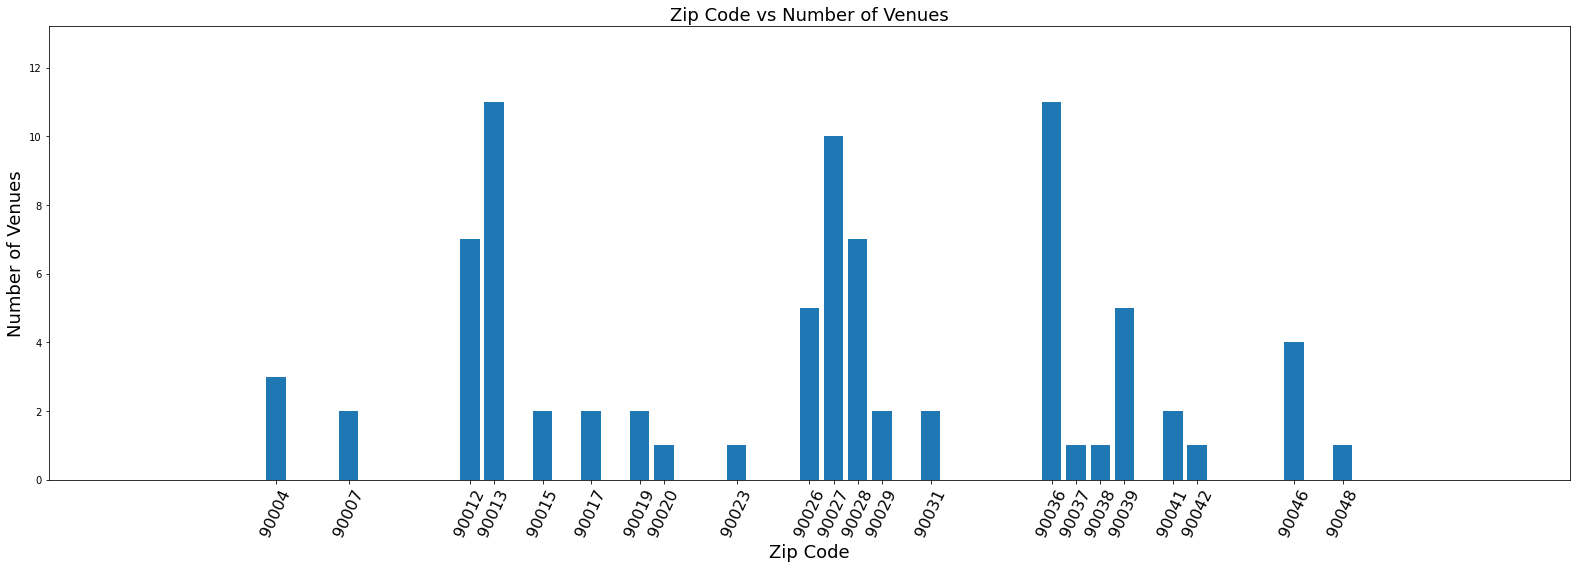

In [92]:
# Bar Plot to show the number of venues in each zip code in the clusters chosen 

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (22,8))
xAxis = group_by_venue['Zip Code']
#print(xAxis.tolist())
yAxis = group_by_venue['Venue']
ax.bar(xAxis, yAxis, width=0.8)

LABELS = group_by_venue['Zip Code']
#print(LABELS)
ax.set_xticks(xAxis)
ax.set_xticklabels(LABELS, rotation = '65', fontsize = '16')
ax.margins(0.2)

ax.set_xlabel('Zip Code', size = 18)
ax.set_ylabel('Number of Venues', size = 18)
ax.set_title('Zip Code vs Number of Venues', size = 18)
fig.tight_layout()
plt.show()


## Conclusions
We could draw the following conclusions based on the above analysis made on the chosen cluster:

1) Bar plot for population shows that 90019, 90004, 90016, 90023, 90007 (in descending order) are zip codes which are more populous compared to the other zip codes in the cluster chosen.

2) Bar plot for median age shows that 90007, 90023, 90017, 90015, 90016 are the zip codes with lesser median age (in ascending order), which means that these are zip codes with younger population compared to all other zip codes in the chosen cluster

3) Bar plot for distance from city center shows that 90012, 90013, 90017, 90015, 90023 (in ascending order) are closer to the city center compared to all the other zip codes in the chosen cluster.

4) Bar plot for the number of venues shows that 90013, 90012, 90068, 90004, 90007 (in descending order) have more venues in the respective area compared to all the other zip codes in the chosen cluster

Based on these four analysis made above, the stakeholder take one or few or all of the results into consideration while chosing a location for his restaurant.

If we were to take distance and number of venues into consideration, few of the zip codes we could recommend are 90012, 90013.

If we were to take population and median age into consideration, few of the zip codes we could recommend are 90007, 90023, 90016

If we were to take median age and distance into consideration, few of the zip codes we could recommend are 90017, 90015, 90023.